In [1]:
# This is the main jupyter notebook for the coursework of MLIS 
## Grp 4B
## Authors
## Alpaslan Erdag , Anshuman Singh , Yixin Fan
## Date - 15/01/2022

<h1> <center> Abstract </center> </h1>
​<em>

There are many factors that can influence the type of tumor but to various extent. This code will construct machine learning models to predict whether a tumour is malignantor benign based on the observed characters.

The data is obtanined from UCI repository which can be obtained from the [here](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29)
</em>

In [2]:
# Loading the Data
about_data ='/Users/anshuman/Desktop/Project_Folder/MLIS_Project_Ideal/breast-cancer-wisconsin.names'
#about_data = '/content/breast-cancer-wisconsin.names'
with open(about_data) as f:
    print(f.read())

Citation Request:
   This breast cancer databases was obtained from the University of Wisconsin
   Hospitals, Madison from Dr. William H. Wolberg.  If you publish results
   when using this database, then please include this information in your
   acknowledgements.  Also, please cite one or more of:

   1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear 
      programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.

   2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology", 
      Proceedings of the National Academy of Sciences, U.S.A., Volume 87, 
      December 1990, pp 9193-9196.

   3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition 
      via linear programming: Theory and application to medical diagnosis", 
      in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying
      Li, editors, SIAM Publications, Philadelphia 199

<h1><center>Code Division</center></h1>

<h2><em>The code is divided in the following parts</em></h2>
<ol>
<li> <h4> Data Cleaning and Data Preprocessing </h4></li> 
<li> <h4>Model Fiting on the clean data </h4></li> 
<li> <h4>Model Accuracy </h4></li>
</ol>
</em>

<h2><center>1. Data Cleaning and Data Preprocessing</center></h2>

<p>To get a good result over model accuracies we are going to first clean the data and then used the cleaned and preprocessed data to train a model. </p>

<p> We will be using a systematic approach to clean our data. That will be listed in the following steps</p>
<em>
&emsp; <li>Data Visulaization</li>
&emsp; <li>Checking and Removing nan values</li>
&emsp; <li>Removing Useless Attributes</li>
&emsp; <li>Deleting Outliers and Data Normalizations</li>
</em>

<h3>1.1 Data Visualization </h3>

<h4>1.1.1 Code </h4>

In [3]:
## Header Files 
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import scipy

## Loading Data 
data = '/Users/anshuman/Desktop/Project_Folder/MLIS_Project_Ideal/breast-cancer-wisconsin.data'
#data = '/content/breast-cancer-wisconsin.data'

In [4]:
# Nameing the columms
col_name = ['Samplecodenumber','ClumpThickness','UniformityofCellSize','UniformityofCellShape',
            'MarginalAdhesion','SingleEpithelialCellSize','BareNuclei',
            'BlandChromatin','NormalNucleoli','Mitoses','Class']
cancerdata = pd.read_csv(data,low_memory=False,names=col_name)
cancerdata.head()

,Samplecodenumber,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
## Removing attribute that is of no use
cancerdata = cancerdata.drop(['Samplecodenumber'], 1)

In [6]:
# The number of samples present by class count
cancerdata['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [7]:
# Making the class counts to similar size
Benign = cancerdata[(cancerdata.Class == 2) ].sample(240).index
Malignant = cancerdata[(cancerdata.Class == 4) ].sample(240).index
cancer = cancerdata.loc[Benign|Malignant]
cancer = cancer.reset_index(drop=True)

# Making the classess from 2/4 to 0/1 
cancer['classes'] = cancer.Class.map({2:0,4:1})
cancer = cancer.drop(['Class'], 1)

# Printing the updated dataframe
cancer.head()

,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,classes
0,5,4,4,5,7,10,3,2,1,0
1,4,1,1,3,2,1,3,1,1,0
2,8,10,10,8,7,10,9,7,1,1
3,1,1,1,1,2,10,3,1,1,0
4,2,1,2,1,2,1,3,1,1,0


In [8]:
# Confirming that counts of the classes are similar 
cancer['classes'].value_counts()


0    240
1    240
Name: classes, dtype: int64

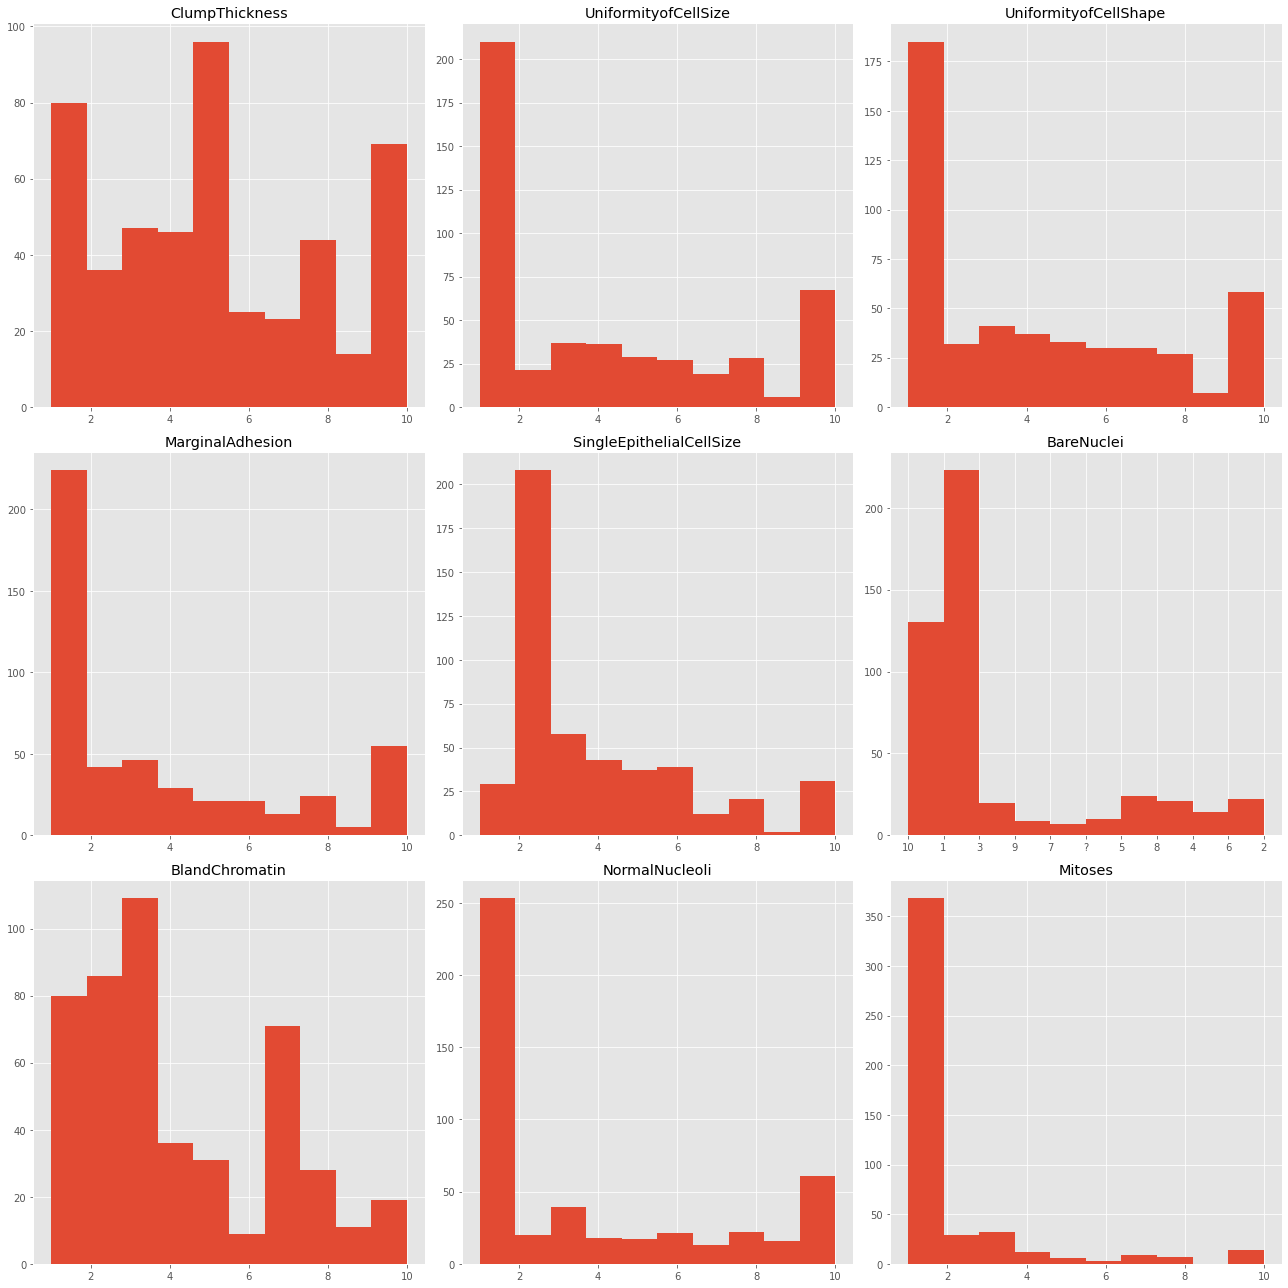

In [9]:
# plot date variables and find the variables with similar distributions, keep only one of them.
#['ClumpThickness','UniformityofCellSize','UniformityofCellShape','MarginalAdhesion',
#'SingleEpithelialCellSize','BareNuclei','BlandChromatin','NormalNucleoli','Mitoses']
fig, axs = plt.subplots(3, 3, figsize=(18,18))
axs[0,0].hist(cancer['ClumpThickness'])
axs[0,0].set_title("ClumpThickness")
axs[0,1].hist(cancer['UniformityofCellSize'])
axs[0,1].set_title("UniformityofCellSize")
axs[0,2].hist(cancer['UniformityofCellShape'])
axs[0,2].set_title("UniformityofCellShape")
axs[1,0].hist(cancer['MarginalAdhesion'])
axs[1,0].set_title("MarginalAdhesion")
axs[1,1].hist(cancer['SingleEpithelialCellSize'])
axs[1,1].set_title("SingleEpithelialCellSize")
axs[1,2].hist(cancer['BareNuclei'])
axs[1,2].set_title("BareNuclei")
axs[2,0].hist(cancer['BlandChromatin'])
axs[2,0].set_title("BlandChromatin")
axs[2,1].hist(cancer['NormalNucleoli'])
axs[2,1].set_title("NormalNucleoli")
axs[2,2].hist(cancer['Mitoses'])
axs[2,2].set_title("Mitoses")
fig.tight_layout()

<h4>1.1.2 Observations </h4>
<ol>
    <li>The class counts is in a 2:1 ratio with benign being 458 and malignant being 241</li>
    <li>The graph shows that data is very skewed for every attribute</li>
</ol>
<h4>1.1.3 Approach </h4>
<ol>
    <li>First we make the class ratio 1:1 and making data points to 240 for each class</li>
</ol>

<h3>1.2 Checking and Removing nan values</h3>

<h4>1.2.1 Code </h4>

In [10]:
# Printing all the value counts 
cancer.dtypes.value_counts()

int64     9
object    1
dtype: int64

In [11]:
# Printing data types
cancer.select_dtypes('object')

,BareNuclei
0,10
1,1
2,10
3,10
4,1
...,...
475,1
476,5
477,3
478,4


In [12]:
#Replacing nan Values
cancer = cancer.replace('?' ,np.nan)

##Finding the the count and percentage of values that are missing in the dataframe.
null1 = pd.DataFrame({'Count': cancer.isnull().sum(), 'Percent': 100*cancer.isnull().sum()/len(cancer)})

##printing columns with null count more than 0
null1[null1['Count'] > 0]

,Count,Percent
BareNuclei,10,2.083333


In [13]:
## Filling the columns with nan values with mean of the data
cancer["BareNuclei"]=cancer["BareNuclei"].astype(float)
cancer=cancer.fillna(cancer.mean())

<h4>1.2.2 Observations </h4>
<ol>
    <li>We obsereve that there is one attribute that is not in integer format</li>
    <li>We find that there are nan values in BareNuclei. It also mentioned in the .names file </li>
</ol>
<h4>1.2.3 Approach </h4>
<ol>
    <li>We find that BareNuclei is a object type attribute so we convert it to float</li>
    <li>We replace nan values in BareNuclei with mean value of BareNuclei</li>
</ol>

<h3>1.3 Removing Useless Attributes </h3>

<h4>1.3.1 Code </h4>

In [14]:
#Sorting with correlation values
corr_list1=cancer.corr()['classes'].abs().sort_values(ascending=False)
corr_list_new=corr_list1[corr_list1>0.01].index.values.tolist()
corr_list1
cancer=cancer[corr_list_new]
cancer.head(3)

,classes,BareNuclei,UniformityofCellShape,UniformityofCellSize,BlandChromatin,ClumpThickness,NormalNucleoli,MarginalAdhesion,SingleEpithelialCellSize,Mitoses
0,0,10.0,4,4,3,5,2,5,7,1
1,0,1.0,1,1,3,4,1,3,2,1
2,1,10.0,10,10,9,8,7,8,7,1


In [15]:
## To remove outliers first we have to find the correlation between attributes

#find the variables with high correlations
cor1 = cancer.corr().abs()
list1 = cor1.stack().sort_values(ascending=False).drop_duplicates()  
high_corr= list1[list1>0.70].index.values.tolist()
high_corr.remove(high_corr[0])

display(list1)

classes                   classes                     1.000000
UniformityofCellShape     UniformityofCellSize        0.896135
BareNuclei                classes                     0.790426
classes                   UniformityofCellShape       0.790049
UniformityofCellSize      classes                     0.789792
BlandChromatin            UniformityofCellSize        0.736743
classes                   BlandChromatin              0.732656
SingleEpithelialCellSize  UniformityofCellSize        0.723037
BlandChromatin            UniformityofCellShape       0.716162
classes                   ClumpThickness              0.712987
SingleEpithelialCellSize  UniformityofCellShape       0.686486
UniformityofCellShape     NormalNucleoli              0.684205
UniformityofCellSize      NormalNucleoli              0.682809
NormalNucleoli            classes                     0.677401
UniformityofCellSize      MarginalAdhesion            0.667173
UniformityofCellShape     BareNuclei                  0

In [16]:
# for variable pairs with high correlation, keep only one of them
columnlist=list(cancer.columns)
len(high_corr)
for i in range(len(high_corr)):
    if "classes" in high_corr[i]:
        columnlist=columnlist
    else:
        if high_corr[i][0] in columnlist and high_corr[i][1] in columnlist:
            columnlist.remove(high_corr[i][1])
        else:
            columnlist=columnlist
cancer_final=cancer[columnlist]

In [17]:
# Numpy Reference in [1]
# To shuffle data and then split  
def shuffle_split_data(x, y):
    arr_rand = np.random.rand(x.shape[0])
    split = arr_rand < np.percentile(arr_rand, 75)

    x_train = x[split]
    y_train = y[split]
    x_test =  x[~split]
    y_test = y[~split]

    print(len(x_train), len(y_train), len(x_test), len(y_test))
    return x_train, y_train, x_test, y_test


# Dividing the data in classes  
x = cancer_final.drop(['classes'], 1)
y = cancer_final[['classes']]
x = np.array(x)
y = np.array(y)
train_x_norm,train_y_norm,test_x_norm,test_y_norm = shuffle_split_data(x,y)

360 360 120 120


<h4>1.3.2 Observations </h4>
<ol>
    <li>We find the correlation list of the attributes</li>
</ol>

<h4>1.3.3 Approach </h4>
<ol>
    <li>We remove the attributes that have low correlations from the data frame</li>
    <li>We split the data in test and train datasets</li>
</ol>

<h3>1.4 Deleting Outliers and Data Normalizations</h3>

<h4>1.4.1 Code </h4>

In [18]:
# Remove outliers
cancer_norm = cancer_final[(np.abs(scipy.stats.zscore(cancer_final)) < 3).all(axis=1)]
# Zero mean normalisation
cancer_norm.iloc[:,1:]=(cancer_norm.iloc[:,1:]-cancer_norm.iloc[:,1:].mean())/cancer_norm.iloc[:,1:].std()

In [19]:
#printing the normalized head of the data
cancer_norm.head()

,classes,BareNuclei,BlandChromatin,ClumpThickness,NormalNucleoli,MarginalAdhesion,SingleEpithelialCellSize,Mitoses
0,0,1.435322,-0.365591,0.020646,-0.424254,0.542549,1.476816,-0.405173
1,0,-0.872741,-0.365591,-0.317805,-0.727576,-0.108510,-0.672387,-0.405173
2,1,1.435322,1.965049,1.035999,1.092355,1.519138,1.476816,-0.405173
3,0,1.435322,-0.365591,-1.333157,-0.727576,-0.759569,-0.672387,-0.405173
4,0,-0.872741,-0.365591,-0.994706,-0.727576,-0.759569,-0.672387,-0.405173


In [20]:
# Numpy Reference in [1]

# To shuffle the data and split data
def shuffle_split_data(x, y):
    
    # To randomize 
    arr_rand = np.random.rand(x.shape[0])
    
    # To split numpy percentile by frequency 
    split = arr_rand < np.percentile(arr_rand, 75)

    x_train = x[split]
    y_train = y[split]
    x_test =  x[~split]
    y_test = y[~split]
    
    # Return train and test
    return x_train, y_train, x_test, y_test

# Dividing the data in classes 
x = cancer_norm.drop(['classes'], 1)
y = cancer_norm[['classes']]
x = np.array(x)
y = np.array(y)
train_x_norm,train_y_norm,test_x_norm,test_y_norm = shuffle_split_data(x,y)

In [21]:
# Print the shape of the data attributes
x_train = np.array(train_x_norm)
print('X_train Shape :',x_train.shape)
y_train = np.array(train_y_norm)
print('Y_train Shape :',y_train.shape)
x_test = np.array(test_x_norm)
print('X_test Shape  :',x_test.shape)
y_test = np.array(test_y_norm)
print('Y_test Shape  :',y_test.shape)

X_train Shape : (344, 7)
Y_train Shape : (344, 1)
X_test Shape  : (115, 7)
Y_test Shape  : (115, 1)


In [22]:
# Changed the shape of the y_train from (x,1) to (x,)
y_train=y_train.reshape(len(y_train))
print(y_train.shape)
y_test=y_test.reshape(len(y_test))
print(y_test.shape)

(344,)
(115,)


<h3>1.5 Conclusion </h3>
<ol>
    <li>We removed the NAN values from our data and replaced them with mean values</li>
    <li>We only keep highly correlated attributes in our final attribute list</li>
    <li>We filter our data using the zscores and then normalize it usind mean and standard deviation</li>
</ol>

<h2><center>2. Model Fiting on the clean data</center></h2>

We have a cleaned and a normalized data now we just have to fit a model over the data and make predictions.
We are going to implement 2 models that are implemented by us 

<ol>
    <li>SGD Classifier with Log Loss</li>
    <li>SVM with RBF kernel</li>
</ol>


<h3>2.1 SGD Classifier with Log Loss</h3>

<h4>2.1.1 Function Call</h4>

In [23]:
## importing self made SGD classifier as Classifier 1 
import Sgd_classifier as classfier_1
alpha=0.001
t_rate=0.001
N=len(x_train)
epochs=300
w,b,loss_train,loss_test=classfier_1.train_classifier(x_train,y_train,x_test,y_test,epochs,alpha,t_rate)

  6%|▌         | 18/300 [00:00<00:01, 173.98it/s]


-- Epoch no(iteration no)  1
W intercept: [0.00589366 0.0071683  0.00944719 0.00659084 0.00534027 0.00666425
 0.00314309], B intercept: 0.0014940778113680297, Train loss: 0.29451, Test loss: 0.29490

-- Epoch no(iteration no)  2
W intercept: [0.0135065  0.00944206 0.01828957 0.01382438 0.00864489 0.01572926
 0.00984201], B intercept: 0.0029891084518740116, Train loss: 0.28823, Test loss: 0.28914

-- Epoch no(iteration no)  3
W intercept: [0.02374891 0.01449139 0.02527925 0.01637294 0.01601309 0.02351505
 0.01607061], B intercept: 0.0053539747967795105, Train loss: 0.28179, Test loss: 0.28328

-- Epoch no(iteration no)  4
W intercept: [0.03483868 0.02265907 0.03244267 0.02779184 0.02636277 0.03460539
 0.02175927], B intercept: 0.004686592618930843, Train loss: 0.27289, Test loss: 0.27493

-- Epoch no(iteration no)  5
W intercept: [0.04388875 0.03178201 0.0433448  0.03903144 0.03378178 0.04202868
 0.02526803], B intercept: 0.009463111259034655, Train loss: 0.26500, Test loss: 0.26745

-

 23%|██▎       | 69/300 [00:00<00:00, 232.04it/s]


-- Epoch no(iteration no)  43
W intercept: [0.2893827  0.24656061 0.25730741 0.22617163 0.21739403 0.2207674
 0.13213185], B intercept: -0.003959490739183488, Train loss: 0.13858, Test loss: 0.14611

-- Epoch no(iteration no)  44
W intercept: [0.29484117 0.24879701 0.2605689  0.22817188 0.22061861 0.2249628
 0.13526226], B intercept: -0.002256403519432138, Train loss: 0.13715, Test loss: 0.14478

-- Epoch no(iteration no)  45
W intercept: [0.30038267 0.25138897 0.26373043 0.23035004 0.22460194 0.2283681
 0.13671989], B intercept: -0.0033919787626388886, Train loss: 0.13574, Test loss: 0.14342

-- Epoch no(iteration no)  46
W intercept: [0.30417468 0.25461287 0.26729546 0.23496852 0.228068   0.2309335
 0.1372915 ], B intercept: -0.002212896195881225, Train loss: 0.13440, Test loss: 0.14210

-- Epoch no(iteration no)  47
W intercept: [0.31095986 0.25731314 0.27176328 0.2365812  0.22985067 0.23433795
 0.13930736], B intercept: -0.0012703139433941437, Train loss: 0.13298, Test loss: 0.140

-- Epoch no(iteration no)  87
W intercept: [0.45440831 0.37308021 0.3943213  0.33797959 0.32479767 0.32510366
 0.19383061], B intercept: -0.0010609946743379318, Train loss: 0.09796, Test loss: 0.10652

-- Epoch no(iteration no)  88
W intercept: [0.45857717 0.37419536 0.39705263 0.33925901 0.32550803 0.32641936
 0.19438345], B intercept: 0.0001063006369913796, Train loss: 0.09746, Test loss: 0.10605

-- Epoch no(iteration no)  89
W intercept: [0.46239724 0.37664073 0.39943983 0.34167985 0.32657988 0.32694144
 0.19440128], B intercept: 0.002627053277740103, Train loss: 0.09693, Test loss: 0.10555

-- Epoch no(iteration no)  90
W intercept: [0.46598254 0.37808373 0.40309037 0.34291624 0.33018567 0.32781377
 0.19485048], B intercept: 0.0038420663432701474, Train loss: 0.09634, Test loss: 0.10499

-- Epoch no(iteration no)  91
W intercept: [0.46832926 0.37990648 0.40565006 0.34487734 0.33197479 0.32944562
 0.19737428], B intercept: 0.003014021640912487, Train loss: 0.09584, Test loss: 0.104

 43%|████▎     | 128/300 [00:00<00:00, 268.97it/s]

 99
W intercept: [0.48798597 0.40078611 0.42413338 0.36107256 0.34428705 0.34374918
 0.20641009], B intercept: 0.002759617271316043, Train loss: 0.09191, Test loss: 0.10064

-- Epoch no(iteration no)  100
W intercept: [0.49194227 0.40151681 0.42625728 0.36124577 0.3464314  0.34530892
 0.2071669 ], B intercept: 0.002098030840441855, Train loss: 0.09150, Test loss: 0.10024

-- Epoch no(iteration no)  101
W intercept: [0.49397863 0.40272188 0.42752837 0.36344721 0.34814518 0.3463449
 0.20726054], B intercept: 0.00279344907996895, Train loss: 0.09117, Test loss: 0.09992

-- Epoch no(iteration no)  102
W intercept: [0.49823059 0.40406405 0.43045695 0.36472509 0.34908621 0.34836563
 0.20837255], B intercept: 0.003119194995081262, Train loss: 0.09067, Test loss: 0.09945

-- Epoch no(iteration no)  103
W intercept: [0.50109326 0.40638108 0.43246007 0.3672577  0.35022814 0.3493372
 0.20828616], B intercept: 0.005230287945329863, Train loss: 0.09024, Test loss: 0.09905

-- Epoch no(iteration no)

-- Epoch no(iteration no)  145
W intercept: [0.60000337 0.47825089 0.51506917 0.428023   0.40649729 0.39955949
 0.24140471], B intercept: 0.01771744956883218, Train loss: 0.07681, Test loss: 0.08619

-- Epoch no(iteration no)  146
W intercept: [0.60166074 0.47920438 0.51699327 0.42877384 0.4074714  0.39959173
 0.24359105], B intercept: 0.016724586886763298, Train loss: 0.07661, Test loss: 0.08599

-- Epoch no(iteration no)  147
W intercept: [0.6037823  0.48032964 0.5200618  0.43003038 0.40762637 0.40091727
 0.24418284], B intercept: 0.016391527335594555, Train loss: 0.07636, Test loss: 0.08573

-- Epoch no(iteration no)  148
W intercept: [0.60553229 0.48275633 0.52051818 0.43128032 0.40845103 0.40190441
 0.24471174], B intercept: 0.01586069918238476, Train loss: 0.07616, Test loss: 0.08553

-- Epoch no(iteration no)  149
W intercept: [0.60791724 0.4847719  0.52172009 0.43270862 0.41005146 0.40348816
 0.24534881], B intercept: 0.014927718215608165, Train loss: 0.07590, Test loss: 0.0852

 61%|██████▏   | 184/300 [00:00<00:00, 267.24it/s]

 156
W intercept: [0.6196975  0.49481986 0.53296417 0.4410695  0.41764803 0.40977783
 0.25056218], B intercept: 0.018474391708548466, Train loss: 0.07442, Test loss: 0.08390

-- Epoch no(iteration no)  157
W intercept: [0.62283485 0.49573038 0.53476191 0.44203143 0.41821544 0.41129821
 0.25125657], B intercept: 0.01845078466996508, Train loss: 0.07418, Test loss: 0.08367

-- Epoch no(iteration no)  158
W intercept: [0.62521101 0.49744928 0.53636737 0.44365154 0.41861416 0.41176742
 0.25100775], B intercept: 0.020514475739320717, Train loss: 0.07396, Test loss: 0.08348

-- Epoch no(iteration no)  159
W intercept: [0.62770784 0.49780299 0.53862382 0.44401609 0.42092551 0.41160475
 0.25228441], B intercept: 0.022319132241102393, Train loss: 0.07374, Test loss: 0.08331

-- Epoch no(iteration no)  160
W intercept: [0.6293621  0.49922526 0.54017786 0.44531414 0.42202066 0.41274315
 0.25284459], B intercept: 0.021164840575121767, Train loss: 0.07354, Test loss: 0.08310

-- Epoch no(iteration 

-- Epoch no(iteration no)  198
W intercept: [0.69524275 0.54734831 0.5958056  0.48409    0.45519604 0.44227236
 0.2760846 ], B intercept: 0.03256954094325694, Train loss: 0.06715, Test loss: 0.07718

-- Epoch no(iteration no)  199
W intercept: [0.69788746 0.54868163 0.59699242 0.48531767 0.45489524 0.44260376
 0.27543017], B intercept: 0.034986335584006246, Train loss: 0.06699, Test loss: 0.07707

-- Epoch no(iteration no)  200
W intercept: [0.6996707  0.54911827 0.59877968 0.48619461 0.45753096 0.44357864
 0.27532864], B intercept: 0.036493553749670886, Train loss: 0.06682, Test loss: 0.07694

-- Epoch no(iteration no)  201
W intercept: [0.70094952 0.54983553 0.60022184 0.48665069 0.4580986  0.44337019
 0.27725664], B intercept: 0.035681390169533894, Train loss: 0.06671, Test loss: 0.07683

-- Epoch no(iteration no)  202
W intercept: [0.70269127 0.55047161 0.60289949 0.48758557 0.45807126 0.44432714
 0.27780128], B intercept: 0.03545120134150272, Train loss: 0.06656, Test loss: 0.0766

 79%|███████▉  | 238/300 [00:00<00:00, 262.85it/s]

 208
W intercept: [0.70875716 0.56130279 0.61077016 0.49484208 0.46203264 0.44778024
 0.28144644], B intercept: 0.03708303346879711, Train loss: 0.06576, Test loss: 0.07592

-- Epoch no(iteration no)  209
W intercept: [0.71068005 0.5612901  0.61146758 0.49563549 0.46339727 0.44906173
 0.28258678], B intercept: 0.03796413295232932, Train loss: 0.06564, Test loss: 0.07583

-- Epoch no(iteration no)  210
W intercept: [0.71377324 0.5614704  0.61261354 0.49487903 0.46444221 0.44986791
 0.28290701], B intercept: 0.03768049057948473, Train loss: 0.06551, Test loss: 0.07572

-- Epoch no(iteration no)  211
W intercept: [0.71498899 0.56161956 0.61298718 0.49564241 0.46524872 0.4500938
 0.28284452], B intercept: 0.03815242658788401, Train loss: 0.06544, Test loss: 0.07566

-- Epoch no(iteration no)  212
W intercept: [0.71763272 0.56242582 0.61441722 0.49652521 0.4656537  0.45124971
 0.28334273], B intercept: 0.03812479191625348, Train loss: 0.06529, Test loss: 0.07552

-- Epoch no(iteration no)  

-- Epoch no(iteration no)  254
W intercept: [0.77840994 0.60392971 0.66497062 0.52926691 0.49280737 0.47227164
 0.3027873 ], B intercept: 0.05587942071624124, Train loss: 0.06078, Test loss: 0.07162

-- Epoch no(iteration no)  255
W intercept: [0.78024913 0.60447932 0.66676767 0.53015604 0.49411998 0.47281569
 0.30280504], B intercept: 0.05679272156719544, Train loss: 0.06066, Test loss: 0.07152

-- Epoch no(iteration no)  256
W intercept: [0.7807549  0.604772   0.6675534  0.53028425 0.49557948 0.47270582
 0.3043154 ], B intercept: 0.05674614088338486, Train loss: 0.06060, Test loss: 0.07148

-- Epoch no(iteration no)  257
W intercept: [0.78225002 0.60517442 0.6700181  0.53110699 0.49547401 0.47350427
 0.30484016], B intercept: 0.056545404776445346, Train loss: 0.06049, Test loss: 0.07137

-- Epoch no(iteration no)  258
W intercept: [0.78313152 0.60677389 0.67027306 0.53180811 0.49554042 0.47387982
 0.30496029], B intercept: 0.056584921085424886, Train loss: 0.06043, Test loss: 0.07131

100%|██████████| 300/300 [00:01<00:00, 259.51it/s]


-- Epoch no(iteration no)  265
W intercept: [0.79128238 0.61433725 0.67817984 0.53690495 0.50037412 0.47729242
 0.30913911], B intercept: 0.05914289059914941, Train loss: 0.05979, Test loss: 0.07077

-- Epoch no(iteration no)  266
W intercept: [0.79231414 0.61432894 0.67842693 0.5373983  0.50101033 0.47733229
 0.30904552], B intercept: 0.05959912069285903, Train loss: 0.05975, Test loss: 0.07074

-- Epoch no(iteration no)  267
W intercept: [0.79463009 0.61496586 0.67954939 0.53812859 0.50131323 0.47829478
 0.30946649], B intercept: 0.05947238094740002, Train loss: 0.05965, Test loss: 0.07065

-- Epoch no(iteration no)  268
W intercept: [0.79644422 0.6162467  0.68048036 0.53904341 0.50105565 0.47823141
 0.30904876], B intercept: 0.06127232006999591, Train loss: 0.05955, Test loss: 0.07059

-- Epoch no(iteration no)  269
W intercept: [0.79778629 0.61619544 0.68210173 0.53914582 0.50294395 0.47803787
 0.30995901], B intercept: 0.06278357632118733, Train loss: 0.05946, Test loss: 0.07054


<h4>2.1.2 Coding Approach</h4>
We send our train data, test data, with learning rate and regularization rate to our classifier. The classifier uses Stochastic gradient descent and updates the weights and bais over the epochs. With each epoch we aim to reduce our loss, when we reach a point where the loss is similar to the loss that was in previous epoch we return then updated weights and bais. These weights and bais that are returned are optimal for making predictions.

<h3>2.2 SVM with RBF kernel </h3>

<h4>2.2.1 Function Call</h4>

In [30]:
# import Svm_classifier as classfier_2

# a1=classfier_2.SVM(kernel='rbf', C=0.5, max_iter=10, gamma=0.001)
# a1.fit(x_train,y_train)

import Svm_classifier as classfier_2

a1=classfier_2.OurSVM(kernel='linear', C=1.0, gamma=0.001)
a1.fit(x_train, y_train)
#y_ = a1.predict(x_test)

NameError: name 'm' is not defined

<h4>2.2.2 Coding Approach</h4>

<!----> Will be going over the coding how it is done and stuff

<h2><center>3. Model Accuracy</center></h2>
<em>
Here we are going to talk about the model accuracies by using test and train loss graphs, in addition to Confussion Matrix and some ROC curves
</em>

<h3>3.1 Model 1 SGD Classifier with Log Loss</h3>


<h4>3.1.1 Prediction accuracies</h4>

In [ ]:
# Getting the predict vector for the train and test data
y_train_pred = classfier_1.predict(w,b,x_train)
y_test_pred = classfier_1.predict(w,b,x_test)

#y_train=y_train.reshape(y_train_pred.shape)
print('Train_Accuracy : {:.3f}'.format((y_train ==  y_train_pred).sum() / len(x_train)))
#y_test=y_test.reshape(y_test_pred.shape)
print('Test_Accuracy  : {:.3f}'.format((y_test ==  y_test_pred).sum() / len(x_test)))

<h4>3.1.2 Test and Train Loss over Epochs</h4>
We will plot graph against the number of epochs with respect to the test and train loss. This will give us insight whether our code is performing gradient descent in a correct manner.

In [ ]:
# Converting epochs to an array and ploting the graphs of test and train loss over the epochs
epochs = np.arange(1, epochs+1, 1)
plt.figure(figsize=(15, 7))
plt.plot(epochs,loss_train, label='Train Loss', c = 'blue')
plt.plot(epochs,loss_test, label='Test Loss',c = 'red')
plt.title('Epoch vs Train,Test Loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
print(110*'=')


<h4>3.1.3 Confusion Matrix and Performance Metrics</h4>
The confusion matrix we plot here looks like the table mentioned below :-
<table>
  <tr>
    <th><em><h4>Total Population</h4></em></th>
    <th><em><h4>Malignant</h4></em></th>
    <th><em><h4>Benign</h4></em></th>
  </tr>
  <tr>
    <td><center><em><h4>Predicted Malignant</h4></em></center></td>
      <td><center><h5>True Positives</h5></center></td>
    <td><center><h5>False Positives</h5></center></td> 
  </tr>
  <tr>
     <td><em><h4>Predicted Benign</h4></em></td>
     <td><center><h5>False Negatives</h5></center></td>
     <td><center><h5>True Negatives</h5></center></td>
  </tr>
</table>



In [ ]:
# Calling our confusion matrix from the directory

import confusion_matrix as cm
cm_sgd,fpr_sgd,recall_sgd,AUC_score_sgd,precision_sgd,F1_score_sgd= cm.confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix\n',cm_sgd)
print('False Positive Rate :   {:.3f}'.format(fpr_sgd))
print('True Positive Rate  :   {:.3f}'.format(recall_sgd))
print('Precision of model  :   {:.3f}'.format(precision_sgd))
print('Area Under Curve (AUC): {:.3f}'.format(AUC_score_sgd))
print('F1 score of model   :   {:.3f}'.format(F1_score_sgd))


<h3> 3.2 Model 2 SVM with RBF Kernel</h3>

<h4>3.2.1 Prediction accuracies</h4>

In [ ]:
# Getting the predict vector for the train and test data

y_train_pred_svm = a1.predict(x_train)
y_test_pred_svm= a1.predict(x_test)
print('Train_Accuracy : {:.3f}'.format((y_train ==  y_train_pred_svm).sum() / len(x_train)))
print('Test_Accuracy  : {:.3f}'.format((y_test ==  y_test_pred_svm).sum() / len(x_test)))


<h4>3.2.2  APLS GRAPH</h4>
<!---> Some grpah here ALP  <--->

<h4>3.2.3 Confusion Matrix and Performance Metrics</h4> 
The confusion matrix we plot here looks like the table mentioned below :-
<table>
  <tr>
    <th><em><h4>Total Population</h4></em></th>
    <th><em><h4>Malignant</h4></em></th>
    <th><em><h4>Benign</h4></em></th>
  </tr>
  <tr>
    <td><center><em><h4>Predicted Malignant</h4></em></center></td>
      <td><center><h5>True Positives</h5></center></td>
    <td><center><h5>False Positives</h5></center></td> 
  </tr>
  <tr>
     <td><em><h4>Predicted Benign</h4></em></td>
     <td><center><h5>False Negatives</h5></center></td>
     <td><center><h5>True Negatives</h5></center></td>
  </tr>
</table>

In [ ]:
# Calling our confusion matrix from the directory

import confusion_matrix as cm
cm_svm,fpr_svm,recall_svm,AUC_score_svm,precision_svm,F1_score_svm= cm.confusion_matrix(y_test, y_test_pred_svm)
print('Confusion Matrix\n',cm_svm)
print('False Positive Rate :   {:.3f}'.format(fpr_svm))
print('True Positive Rate  :   {:.3f}'.format(recall_svm))
print('Precision of model  :   {:.3f}'.format(precision_svm))
print('Area Under Curve (AUC): {:.3f}'.format(AUC_score_svm))
print('F1 score of model   :   {:.3f}'.format(F1_score_svm))



<h2><center>Model Comparisions</center></h2>

<h3><center>Metrics Comparsions</center></h3>


In [ ]:
# Making a data frame of all the result 
cols = ['Metric' , 'SGD Classifier' , 'SVM Classifier']
values = [['F1_score',F1_score_sgd,F1_score_svm] ,[ 'Recal',recall_sgd,recall_svm]\
          ,['FPR',fpr_sgd,fpr_svm],['AUC',AUC_score_sgd,AUC_score_svm]\
          ,['Precision',precision_sgd,precision_svm]]
result = pd.DataFrame(values, columns = cols) 

In [ ]:
# Printing the result
print(result)

<h2><center>Conclusions</center></h2>
We were given a task to implement a model which was meant to classify between Malignant and Benign and measure the performance metrics of the implemented model. To achive the aim of the coursework we made two classification models that perform binary classification for the given dataset. 
<br> </br>
<p>
<em>
The following are the results obtained for the repesctive implemented models :-
<p></em>
<em>    
    
<br><h4>1. Stochastic Gradient Descent Classifier </h4>


In [ ]:
# printing only the SGD classifier from Result
result.loc[:,['Metric','SGD Classifier']]


<em><br><h4>2. Support Vector Machine </h4>



In [ ]:
# Printing only SVM classifier from Result
result.loc[:,['Metric','SVM Classifier']]

<h2><center> Coding References</center></h2>



1. [Confusion Matrix](https://www.nbshare.io/notebook/626706996/Learn-And-Code-Confusion-Matrix-With-Python/)
2. [SGD Classifier <sup>[1]</sup>](https://www.cs.princeton.edu/courses/archive/fall18/cos324/files/logistic-regression.pdf)
3. [SGD Classifier <sup>[2]</sup>]()
4. [Pandas <sup>[1]</sup>](https://stackoverflow.com/questions/43772362/how-to-print-a-specific-row-of-a-pandas-dataframe)
5. [Pandas <sup>[2]</sup>]()
6. [SVM <sup>[1]</sup>]()
7. [SVM <sup>[2]</sup>]()
8. [SVM <sup>[3]</sup>]()
9. [Numpy<sup>[1]</sup>](https://stackoverflow.com/questions/35932223/writing-a-train-test-split-function-with-numpy)


<!--> ALP add some references add hyper links in there <--->